# AI based Muscle Activation Patterns in Daily Grasping Movements from EMG  Data 

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from feature_engine.outliers import Winsorizer
from sklearn.linear_model import LogisticRegression
import os
import joblib
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score

In [68]:
stacked_df = pd.read_csv(r"stacked_abnormal_data.csv")

In [69]:
stacked_df = stacked_df.loc[:, :'label']
stacked_df

,Recto Femoral,Biceps Femoral,Vasto Medial,EMG Semitendinoso,Flexo-Extension,label
0,-0.0046,-0.0023,0.0000,0.0007,11.5,Abnormal
1,-0.0105,-0.0068,-0.0046,0.0030,10.3,Abnormal
2,-0.0083,-0.0046,-0.0046,0.0022,10.5,Abnormal
3,-0.0068,-0.0053,-0.0046,0.0000,10.4,Abnormal
4,-0.0030,-0.0015,-0.0030,-0.0030,9.9,Abnormal
...,...,...,...,...,...,...
850510,0.0157,0.0045,0.0172,0.0037,4.1,Abnormal
850511,0.0015,-0.0120,0.0120,-0.0015,3.6,Abnormal
850512,-0.0046,-0.0046,0.0075,0.0015,4.2,Abnormal
850513,-0.0053,-0.0008,-0.0053,0.0030,3.9,Abnormal


In [70]:
stacked_df1 = pd.read_csv(r"stacked_normal_data.csv")
stacked_df1 = stacked_df1.loc[:, :'label']

In [71]:
stacked_df1

,Recto Femoral,Biceps Femoral,Vasto Medial,EMG Semitendinoso,Flexo-Extension,label
0,-0.0015,0.0000,0.0007,0.0000,-1.0,Normal
1,-0.0008,0.0015,0.0030,-0.0015,-1.0,Normal
2,0.0007,0.0015,0.0037,-0.0023,-1.0,Normal
3,-0.0008,0.0000,0.0022,-0.0015,-1.0,Normal
4,0.0000,-0.0008,0.0030,-0.0008,-1.0,Normal
...,...,...,...,...,...,...
474524,0.0022,0.0765,-0.0023,0.0000,1.3,Normal
474525,0.0022,0.0765,-0.0023,0.0000,1.3,Normal
474526,0.0022,0.0765,-0.0023,0.0000,1.3,Normal
474527,0.0022,0.0765,-0.0023,0.0000,1.3,Normal


In [72]:
combined_df = pd.concat([stacked_df, stacked_df1], ignore_index=True)

In [73]:
combined_df

,Recto Femoral,Biceps Femoral,Vasto Medial,EMG Semitendinoso,Flexo-Extension,label
0,-0.0046,-0.0023,0.0000,0.0007,11.5,Abnormal
1,-0.0105,-0.0068,-0.0046,0.0030,10.3,Abnormal
2,-0.0083,-0.0046,-0.0046,0.0022,10.5,Abnormal
3,-0.0068,-0.0053,-0.0046,0.0000,10.4,Abnormal
4,-0.0030,-0.0015,-0.0030,-0.0030,9.9,Abnormal
...,...,...,...,...,...,...
1325039,0.0022,0.0765,-0.0023,0.0000,1.3,Normal
1325040,0.0022,0.0765,-0.0023,0.0000,1.3,Normal
1325041,0.0022,0.0765,-0.0023,0.0000,1.3,Normal
1325042,0.0022,0.0765,-0.0023,0.0000,1.3,Normal


In [74]:
combined_df.head()

,Recto Femoral,Biceps Femoral,Vasto Medial,EMG Semitendinoso,Flexo-Extension,label
0,-0.0046,-0.0023,0.0000,0.0007,11.5,Abnormal
1,-0.0105,-0.0068,-0.0046,0.0030,10.3,Abnormal
2,-0.0083,-0.0046,-0.0046,0.0022,10.5,Abnormal
3,-0.0068,-0.0053,-0.0046,0.0000,10.4,Abnormal
4,-0.0030,-0.0015,-0.0030,-0.0030,9.9,Abnormal


In [75]:
combined_df.tail()

,Recto Femoral,Biceps Femoral,Vasto Medial,EMG Semitendinoso,Flexo-Extension,label
1325039,0.0022,0.0765,-0.0023,0.0,1.3,Normal
1325040,0.0022,0.0765,-0.0023,0.0,1.3,Normal
1325041,0.0022,0.0765,-0.0023,0.0,1.3,Normal
1325042,0.0022,0.0765,-0.0023,0.0,1.3,Normal
1325043,0.0022,0.0765,-0.0023,0.0,1.3,Normal


In [76]:
combined_df.shape

(1325044, 6)

In [77]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325044 entries, 0 to 1325043
Data columns (total 6 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Recto Femoral      1311565 non-null  float64
 1   Biceps Femoral     1311565 non-null  float64
 2   Vasto Medial       1166960 non-null  float64
 3   EMG Semitendinoso  1311565 non-null  float64
 4   Flexo-Extension    1311565 non-null  float64
 5   label              1325044 non-null  object 
dtypes: float64(5), object(1)
memory usage: 60.7+ MB


In [78]:
combined_df.columns

Index(['Recto Femoral', 'Biceps Femoral', 'Vasto Medial', 'EMG Semitendinoso',
       'Flexo-Extension', 'label'],
      dtype='object')

In [79]:
combined_df['label'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [80]:
combined_df.isnull().sum()

Recto Femoral         13479
Biceps Femoral        13479
Vasto Medial         158084
EMG Semitendinoso     13479
Flexo-Extension       13479
label                     0
dtype: int64

In [81]:
# Define a function to fill null values based on column type
def fill_null_values(df):
    for column in df.columns:
        if df[column].dtype == 'object':  # Categorical or object types
            mode_value = df[column].mode()[0]  # Most frequent value
            df[column].fillna(mode_value, inplace=True)
        elif df[column].dtype in ['int64', 'float64']:  # Numerical types
            if df[column].isnull().sum() > 0:  # Check if there are nulls
                median_value = df[column].median()  # Median value for numerical columns
                df[column].fillna(median_value, inplace=True)
        else:
            print(f"Column '{column}' has an unsupported data type for null value filling.")
            
    return df

# Apply the function to fill null values
combined_df = fill_null_values(combined_df)

# Print to verify
print(combined_df.isnull().sum())

Recto Femoral        0
Biceps Femoral       0
Vasto Medial         0
EMG Semitendinoso    0
Flexo-Extension      0
label                0
dtype: int64


In [82]:
combined_df.isnull().sum()

Recto Femoral        0
Biceps Femoral       0
Vasto Medial         0
EMG Semitendinoso    0
Flexo-Extension      0
label                0
dtype: int64

In [83]:
combined_df.describe()

,Recto Femoral,Biceps Femoral,Vasto Medial,EMG Semitendinoso,Flexo-Extension
count,1.325044e+06,1.325044e+06,1.325044e+06,1.325044e+06,1.325044e+06
mean,-3.832713e-04,-4.054769e-04,4.491192e-04,-9.537819e-05,1.923123e+01
std,5.252137e-02,3.410579e-02,5.463738e-02,4.601782e-02,4.531077e+01
min,-1.557800e+00,-8.475000e-01,-1.831500e+00,-1.319300e+00,-1.300000e+02
25%,-5.300000e-03,-5.300000e-03,-4.600000e-03,-5.300000e-03,3.000000e-01
50%,-8.000000e-04,-8.000000e-04,7.000000e-04,0.000000e+00,1.050000e+01
75%,4.500000e-03,4.500000e-03,5.200000e-03,5.200000e-03,5.220000e+01
max,1.545700e+00,8.175000e-01,1.971000e+00,1.719000e+00,1.213000e+02


In [85]:
win=Winsorizer(capping_method='iqr',tail='both',fold=1.5)
combined_df['Recto Femoral']=win.fit_transform(combined_df[['Recto Femoral']])
combined_df['Biceps Femoral']=win.fit_transform(combined_df[['Biceps Femoral']])
combined_df['Vasto Medial']=win.fit_transform(combined_df[['Vasto Medial']])
combined_df['EMG Semitendinoso']=win.fit_transform(combined_df[['EMG Semitendinoso']])
combined_df['Flexo-Extension']=win.fit_transform(combined_df[['Flexo-Extension']])

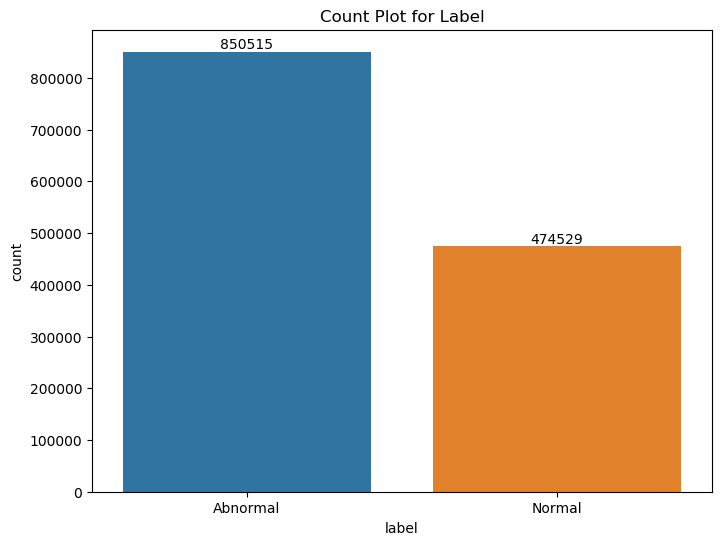

In [87]:
# Create the count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='label', data=combined_df)

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), 'd'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title('Count Plot for Label')
plt.show()


In [88]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder 
combined_df['label'] = le.fit_transform(combined_df['label'])

In [89]:
combined_df

,Recto Femoral,Biceps Femoral,Vasto Medial,EMG Semitendinoso,Flexo-Extension,label
0,-0.0046,-0.0023,0.0000,0.0007,11.5,0
1,-0.0105,-0.0068,-0.0046,0.0030,10.3,0
2,-0.0083,-0.0046,-0.0046,0.0022,10.5,0
3,-0.0068,-0.0053,-0.0046,0.0000,10.4,0
4,-0.0030,-0.0015,-0.0030,-0.0030,9.9,0
...,...,...,...,...,...,...
1325039,0.0022,0.0192,-0.0023,0.0000,1.3,1
1325040,0.0022,0.0192,-0.0023,0.0000,1.3,1
1325041,0.0022,0.0192,-0.0023,0.0000,1.3,1
1325042,0.0022,0.0192,-0.0023,0.0000,1.3,1


In [90]:
# Assuming 'label' is the target variable
target_column = 'label'

# Define X and y
X = combined_df.drop(columns=[target_column])
y = combined_df[target_column]


In [91]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=77 )

In [92]:
labels=['Abnormal', 'Normal']

In [93]:
#defining global variables to store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []

In [94]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, testY,predict):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 

    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

# KNeighborsClassifier

Model loaded successfully.
KNeighborsClassifier Accuracy    : 75.70626443345392
KNeighborsClassifier Precision   : 72.82533866497745
KNeighborsClassifier Recall      : 73.57828124003026
KNeighborsClassifier FSCORE      : 73.14997287980883

 KNeighborsClassifier classification report
               precision    recall  f1-score   support

    Abnormal       0.80      0.83      0.81    255359
      Normal       0.67      0.63      0.65    142155

    accuracy                           0.76    397514
   macro avg       0.74      0.73      0.73    397514
weighted avg       0.75      0.76      0.76    397514



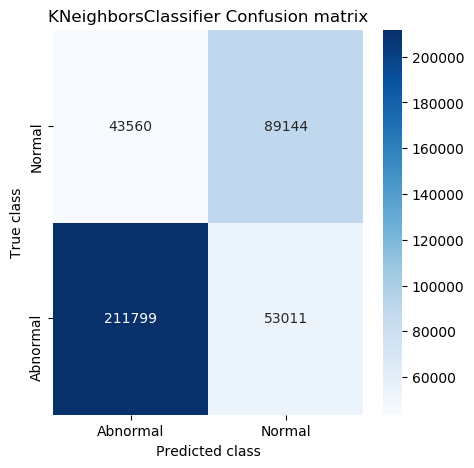

In [95]:
if os.path.exists('model/KNeighborsClassifier.pkl'):
    # Load the trained model from the file
    knnc = joblib.load('model/KNeighborsClassifier.pkl')
    print("Model loaded successfully.")
    predict = knnc.predict(X_test)
    calculateMetrics("KNeighborsClassifier", predict, y_test)
else:
    # Train the model (assuming X_train and y_train are defined)
    knnc = KNeighborsClassifier()
    knnc.fit(X_train, y_train)
    # Save the trained model to a file
    joblib.dump(knnc, 'model/KNeighborsClassifier.pkl')
    print("Model saved successfully.")
    predict = knnc.predict(X_test)
    calculateMetrics("KNeighborsClassifier", predict, y_test)

In [96]:
correlation_matrix = combined_df.corr()
threshold = 0.1

# Find features with correlation above the threshold
high_correlation_features = correlation_matrix.columns[
    (correlation_matrix.abs() > threshold).any()
]

# Filter the DataFrame with high correlation features
filtered_df = combined_df[high_correlation_features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_df)
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Determine the number of components to keep (e.g., components explaining 95% of variance)
n_components = np.where(cumulative_explained_variance >= 0.95)[0][0] + 1

# Keep only the significant principal components
pca_df_reduced = pca_df.iloc[:, :n_components]

# The updated DataFrame with significant principal components
updated_df = pca_df_reduced

In [97]:
updated_df

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.104355,-0.309788,0.386707,-0.285594,-0.650438,0.139837
1,0.192329,-0.227818,0.844356,-0.681308,-0.674223,0.614614
2,0.100063,-0.172533,0.646893,-0.670521,-0.662648,0.423646
3,0.242181,-0.260856,0.503808,-0.640828,-0.682291,0.336336
4,0.123100,-0.266675,0.185961,-0.499536,-0.671914,-0.107251
...,...,...,...,...,...,...
1325039,-0.423729,1.655313,-0.174274,0.226776,0.885391,-1.251173
1325040,-0.423729,1.655313,-0.174274,0.226776,0.885391,-1.251173
1325041,-0.423729,1.655313,-0.174274,0.226776,0.885391,-1.251173
1325042,-0.423729,1.655313,-0.174274,0.226776,0.885391,-1.251173


In [98]:
# Assuming 'label' is the target variable
target_column = 'label'

# Define X and Y
X = updated_df.drop(columns=['PC6'])
y = combined_df['label']

In [99]:
X.shape

(1325044, 5)

In [100]:
y.shape

(1325044,)

In [101]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=77 )

In [102]:
# smote = SMOTE(sampling_strategy='auto', random_state=42)

In [103]:
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [104]:
labels=['Abnormal', 'Normal']

In [105]:
#defining global variables to store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []

In [106]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, testY,predict):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 

    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

# LogisticRegression

Model loaded successfully.
LogisticRegression Accuracy    : 100.0
LogisticRegression Precision   : 100.0
LogisticRegression Recall      : 100.0
LogisticRegression FSCORE      : 100.0

 LogisticRegression classification report
               precision    recall  f1-score   support

    Abnormal       1.00      1.00      1.00    255359
      Normal       1.00      1.00      1.00    142155

    accuracy                           1.00    397514
   macro avg       1.00      1.00      1.00    397514
weighted avg       1.00      1.00      1.00    397514



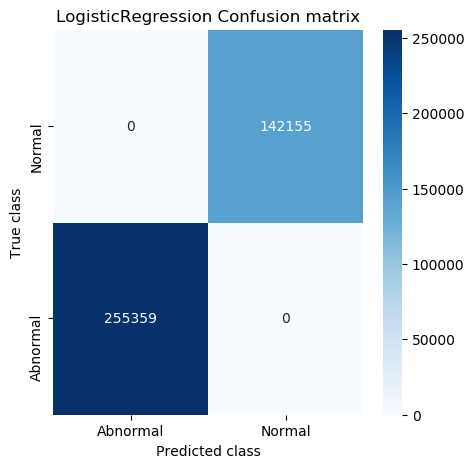

In [107]:
if os.path.exists('model/LogisticRegression.pkl'):
    # Load the trained model from the file
    lrr = joblib.load('model/LogisticRegression.pkl')
    print("Model loaded successfully.")
    predict = lrr.predict(X_test)
    calculateMetrics("LogisticRegression", predict, y_test)
else:
    # Train the model (assuming X_train and y_train are defined)
    lrr = LogisticRegression()
    lrr.fit(X_train, y_train)
    # Save the trained model to a file
    joblib.dump(lrr, 'model/LogisticRegression.pkl')
    print("Model saved successfully.")
    predict = lrr.predict(X_test)
    calculateMetrics("LogisticRegression", predict, y_test)

In [108]:
test = pd.read_csv('test.csv')

In [109]:
test

,Recto Femoral,Biceps Femoral,Vasto Medial,EMG Semitendinoso,Flexo-Extension
0,0.0075,-0.0135,0.0015,0.0135,-96.8
1,0.0082,0.0067,-0.0038,0.0000,11.9
2,-0.0195,-0.0645,-0.0083,0.1515,98.5
3,-0.0015,-0.0008,0.0015,0.0007,11.3
4,0.0555,-0.0030,0.2085,-0.0218,8.6
...,...,...,...,...,...
95,0.0255,0.0150,-0.0375,0.0052,3.4
96,-0.0008,0.0030,-0.0015,0.0067,55.1
97,-0.0015,-0.0030,0.0052,-0.0091,63.7
98,-0.2423,-0.0023,-0.2288,-0.0053,-3.1


In [110]:
# Define your labels
labels= ['Abnormal','Normal']
# Make predictions
predict = lrr.predict(test)

# Loop through each prediction and print the corresponding row for the first 10 rows
for i, p in enumerate(predict[:10]):  # Slice to limit to first 10 rows
    label = labels[p]  # Map the prediction to the label
    print(f"Row {i}: {test.iloc[i]}")  # Print the row content
    print(f"Row {i}: ************************************** Prediction: {label}")

Row 0: Recto Femoral         0.0075
Biceps Femoral       -0.0135
Vasto Medial          0.0015
EMG Semitendinoso     0.0135
Flexo-Extension     -96.8000
Name: 0, dtype: float64
Row 0: ************************************** Prediction: Abnormal
Row 1: Recto Femoral         0.0082
Biceps Femoral        0.0067
Vasto Medial         -0.0038
EMG Semitendinoso     0.0000
Flexo-Extension      11.9000
Name: 1, dtype: float64
Row 1: ************************************** Prediction: Normal
Row 2: Recto Femoral        -0.0195
Biceps Femoral       -0.0645
Vasto Medial         -0.0083
EMG Semitendinoso     0.1515
Flexo-Extension      98.5000
Name: 2, dtype: float64
Row 2: ************************************** Prediction: Normal
Row 3: Recto Femoral        -0.0015
Biceps Femoral       -0.0008
Vasto Medial          0.0015
EMG Semitendinoso     0.0007
Flexo-Extension      11.3000
Name: 3, dtype: float64
Row 3: ************************************** Prediction: Normal
Row 4: Recto Femoral        0.0555

In [112]:
test['predict']=predict
test

,Recto Femoral,Biceps Femoral,Vasto Medial,EMG Semitendinoso,Flexo-Extension,predict
0,0.0075,-0.0135,0.0015,0.0135,-96.8,0
1,0.0082,0.0067,-0.0038,0.0000,11.9,1
2,-0.0195,-0.0645,-0.0083,0.1515,98.5,1
3,-0.0015,-0.0008,0.0015,0.0007,11.3,1
4,0.0555,-0.0030,0.2085,-0.0218,8.6,1
...,...,...,...,...,...,...
95,0.0255,0.0150,-0.0375,0.0052,3.4,1
96,-0.0008,0.0030,-0.0015,0.0067,55.1,1
97,-0.0015,-0.0030,0.0052,-0.0091,63.7,1
98,-0.2423,-0.0023,-0.2288,-0.0053,-3.1,0
